<a href="https://colab.research.google.com/github/stefanogiagu/corso_AML_2024/blob/main/notebooks/es5/AML_2024_HandsOn_5_BNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Machine Learning for Physics 2023-24
## Hands-on session 5

Implementation in pytorch of simple Bayesian Neural Network using the library Torchbnn, trained for a classification task

Demo from the [Torchbnn](https://github.com/Harry24k/bayesian-neural-network-pytorch/tree/master) developer with some minor modifications

*Stefano Giagu - v1.0 - 26.3.2024*

In [ ]:
#install torchbnn

!pip install torchbnn

In [ ]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# takes the Iris classification dataset from sklearn

iris = datasets.load_iris()

X = iris.data
Y = iris.target
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

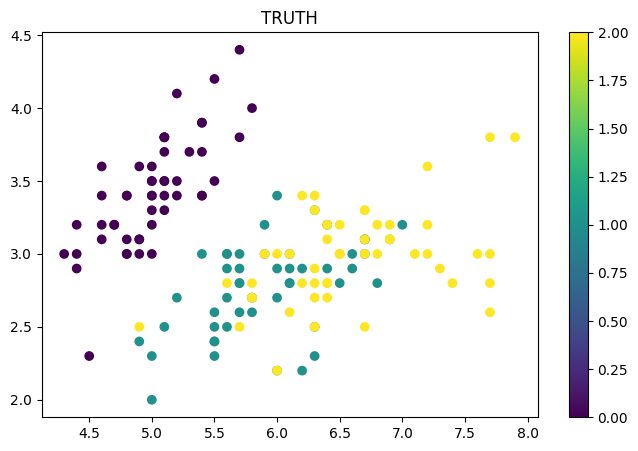

In [ ]:
# plot the dataset

def draw_truth() :
    fig = plt.figure(figsize = (8, 5))
    z1_plot = plt.scatter(X[:, 0], X[:, 1], c = Y)
    plt.colorbar(z1_plot)
    plt.title("TRUTH")
    plt.show()

draw_truth()

In [ ]:
# simple 100 neurons shallow dense NN with bayesian weights with nornmal priors

model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3),
)

In [ ]:
# loss is the sum of a classification (CrossEntropyLoss) + kl_weight*KL divergence

ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

# weight of the KL term in the total loss
kl_weight = 1.0

# adam optimiser
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# training loop

training_steps = 1500

for step in range(training_steps):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

# final accuracy
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()

print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 90.666667 %
- CE : 0.40, KL : 0.31


In [ ]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.

def draw_predicted(n_ex = 4):
    fig = plt.figure(figsize = (40, 5))

    ax0 = fig.add_subplot(1, n_ex+1, 1)
    z0_plot = ax0.scatter(X[:, 0], X[:, 1], c = Y)
    ax0.set_title('TRUTH')
    plt.colorbar(z0_plot,ax=ax0)

    for i in range(n_ex):
      axI = fig.add_subplot(1, n_ex+1, i+2)
      pre = model(x)
      _, predicted = torch.max(pre.data, 1)
      z_plot = axI.scatter(X[:, 0], X[:, 1], c = predicted)

      plt.colorbar(z_plot,ax=axI)
      axI.set_title("PREDICTED")

    plt.show()

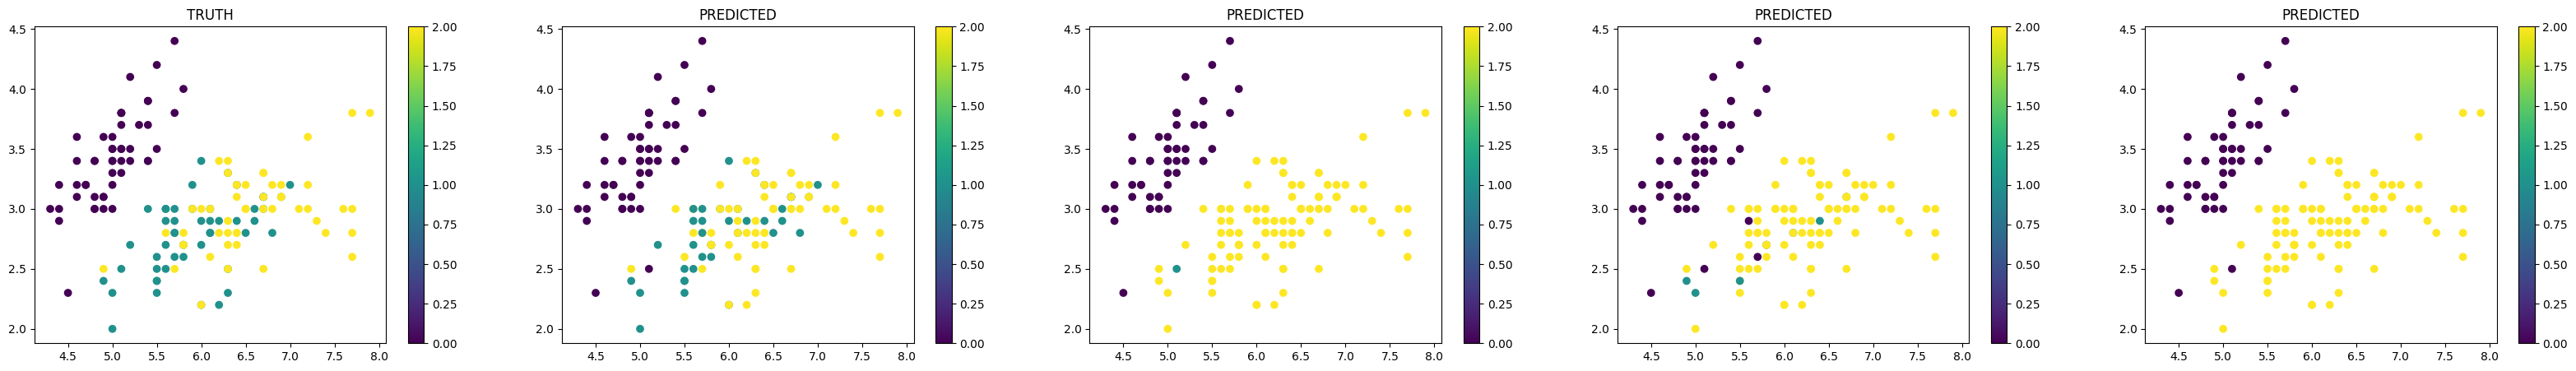

In [ ]:
draw_predicted()